<a href="https://colab.research.google.com/github/JuanGalicia20/Proyecto1Logica/blob/main/Proyecto_inciso1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 1 Lógica Matemática 
##Juan Fernando Ramírez 20666
##Jonathan Espinoza 20022
##Algoritmo Fuerza Bruta 
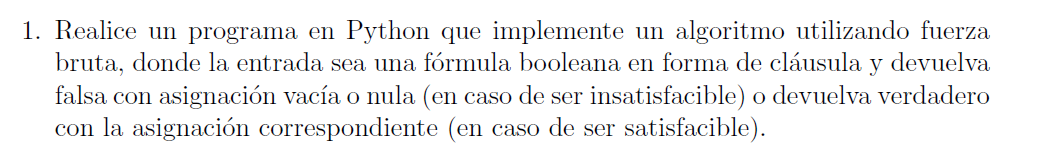
 

In [1]:
import numpy as np
from itertools import product 

In [17]:

#Asignar combinatoria v y f para optener cada opcion 
#leer clausulas 
# p^-p->{{p},{-p}}
#hacer un diccionario para la asignacion v y f y combinatoria de asignacion del dic
def crear_dic(expr):
  asig=[]
  [asig.append(expr[x]) for x in range(len(expr)) if expr[x].isalpha() if expr[x] not in asig]
  asig_f=list(product([0,1], repeat=len(asig)))
  asig_f=[list(asig_f[x]) for x in range(len(list(asig_f)))]
  final=[dict(zip(asig, asig_f[x])) for x in range(len(asig_f))]
  return final

def asignar(expr, dic):
  expr=list(expr)
  for x in range(len(expr)):
    if expr[x]=="{":
      expr[x]="("
    elif expr[x]=="}":
      expr[x]=")"
    elif expr[x].isalpha():
      expr[x]=dic[expr[x]]
  return ''.join(map(str, expr))


def traducir(expr):
  expr=list(expr)
  try:
    for x in range(len(expr)):
      if expr[x]=="-" and expr[x+1] == "0":
        expr[x]="1"
        expr.pop(x+1)
      elif expr[x]=="-" and expr[x+1] == "1":
        expr[x]="0"
        expr.pop(x+1)
      elif expr[x]==",":
        if expr[x-1]==")" and expr[x+1]=="(":
          expr[x]="*"
        else:
          expr[x]="+"
  except:
    ()
  return ''.join(expr)

def fuerza_b(expr):
  
  dic= crear_dic(expr)
  r = ""

  for x in range(len(dic)):
    asig = asignar(expr, dic[x])
    op = traducir(asig)
    res = eval(op)

    if ( res != 0):
      r = "Se satisface la formula con: " + str(dic[x])
      return r

  if len(r) == 0:
    r = "La formula es insatisfacible"
    return r



In [16]:
a= "{{p},{-p}}"
b= "{{q,p,-p}}"
c= "{{-p,-r,-s},{-q,-p,-s}}"
d = "{{-p,-q},{q.-s},{-p,s},{-q,s}}"
e = "{{-p,-q,-r},{q,-r,p}, {-p,q,r}}"
f = "{{r},{-q,-r},{-p,q,-r},{q}}"


print(fuerza_b(a))
print(fuerza_b(b))
print(fuerza_b(c))
print(fuerza_b(d))
print(fuerza_b(e))
print(fuerza_b(f))


La formula es insatisfacible
Se satisface la formula con: {'q': 0, 'p': 0}
Se satisface la formula con: {'p': 0, 'r': 0, 's': 0, 'q': 0}
Se satisface la formula con: {'p': 0, 'q': 0, 's': 0}
Se satisface la formula con: {'p': 0, 'q': 0, 'r': 0}
La formula es insatisfacible
